# Handling Outliers

This will demonstate on how to handle outliers in a sample dataset.

## Importing and loading data

In [18]:
# Importing necessary libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

print(pd.__version__)
print(np.__version__)

2.1.3
1.26.1


In [2]:
# Loading the data
data = pd.read_csv('datasets/titanic_train.csv')

# Checking the data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Describe the data
data.describe().round(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,20.125,0.000,0.000,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


**Fare** has some extreme values. Outliers can be removed.

## Handling outliers

### Calculation of Interquartile Range

In [9]:
# Calculating the IQR to detect the outliers
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)

print(Q1, Q3)

IQR = data['Fare'].quantile(0.75) - data['Fare'].quantile(0.25)
print('IQR:', IQR.round(3))

whisker_1 = Q1 - (1.5 * IQR)
whisker_2 = Q3 + (1.5 * IQR)

print(whisker_1, whisker_2)

7.9104 31.0
IQR: 23.09
-26.724 65.6344


### Delete outliers 

In [13]:
# Checking the data outside of the IQR
bad_data = data.loc[data['Fare'] > 66]
bad_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


In [14]:
# Checking the data inside of the IQR
good_data = data.loc[data['Fare'] < 66]
print(good_data.shape, bad_data.shape, data.shape)

(775, 12) (116, 12) (891, 12)


### Replace outliers

In [15]:
# Checking data outside of the IQR
fare_data = data['Fare'].loc[data['Fare'] < 7]
fare_data.head()

129    6.9750
143    6.7500
179    0.0000
202    6.4958
263    0.0000
Name: Fare, dtype: float64

In [17]:
# Replacing the values with Q1
data['Fare'].loc[data['Fare'] < 7] = Q1

# Checking after replacing
print(data['Fare'].loc[data['Fare'] < 7])

Series([], Name: Fare, dtype: float64)


### Transform variables

<Axes: >

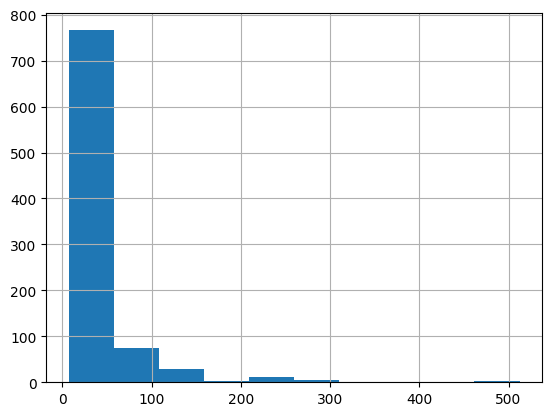

In [19]:
# Create a histogram of the variables
(data['Fare']).hist()

<Axes: >

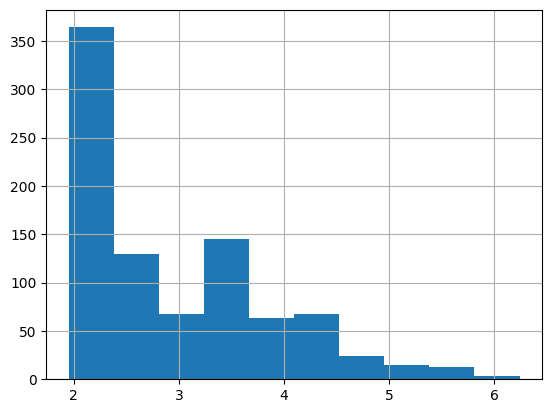

In [20]:
# Create a histogram of the log of the variables
(np.log(data['Fare'])).hist()